# Week 2 Assignment
## Data Exploration
 Working on analyzing + exploring data sets! :)
 Here, I downloaded data from the Neighborhood Data for Social Change website pertaining to populations across Los Angeles and their level of grocery store access. The data is by census tract, and also has counts for different marginalized populations, such as low income, kids, and seniors. While there is geographical data, I was unable to plot as there isn't a geometry in the file as well as the data types all veing objects. I was able to convert one of the values into integers, but realized I'd have to convert all the columns. As a result, I was unable to map and plot, by census tract, but look forward to being able to do so in the future through working in the class. The data set pulls census data from both 2019 and 2015, so I was able to pull a query at the of the assignment for only 2019 data, if we wanted to focus in on a specific year
 

In [76]:
# importing Python libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import requests

# I want to use the census data to map later in the assignment, so I've referenced an outside resource for additional libraries to pull in
# source {https://www.natekratzer.com/posts/census_map/}
#I ended up not being able to map the census tracts, but this was good practitce for pulling it additional census tracts!

In [17]:
# read and adding data file to notebook 
grocery = gpd.read_file('data/All Years Grocery Store Access Calculations.csv')
grocery

#have now created a key term for the entire dataset

,geoid,geoid20,year,denom_total_pop,lowaccess_count,lowaccess_li_count,lowaccess_kids_count,lowaccess_seniors_count,geometry
0,1400000US06037101110,6037101110,2019,4731,115,37,18,12,None
1,1400000US06037101122,6037101122,2019,3664,1704,137,292,260,None
2,1400000US06037101220,6037101220,2019,3363,0,0,0,0,None
3,1400000US06037101221,6037101221,2019,3260,0,0,0,0,None
4,1400000US06037101222,6037101222,2019,2730,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...
4983,1400000US06037980035,6037980035,2015,6728,377,150,110,26,None
4984,1400000US06037980036,6037980036,2015,7785,1835,647,406,243,None
4985,1400000US06037980037,6037980037,2015,2786,0,0,0,0,None
4986,1400000US06037980038,6037980038,2015,5199,55,3,10,15,None


In [18]:
#the above shows the breakdown of the data, showing census tract number, year, total population, low access count, low access count by low income, low access count for kids, and low access count by seniors

In [20]:
#understanding what the data type is
type(grocery)

geopandas.geodataframe.GeoDataFrame

In [26]:
#It looks like the data is a GeoDatFrame. 
#I want to find out more information about the number of columns and rows the data has. 
grocery.shape

(4988, 9)

In [66]:
# The data has 4988 columns and 9 rows, as shown above under the intial pull
# I want to now find out more information about the types of data in our data
grocery.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geoid                    4988 non-null   object  
 1   geoid20                  4988 non-null   object  
 2   year                     4988 non-null   object  
 3   denom_total_pop          4988 non-null   object  
 4   lowaccess_count          4988 non-null   object  
 5   lowaccess_li_count       4988 non-null   object  
 6   lowaccess_kids_count     4988 non-null   object  
 7   lowaccess_seniors_count  4988 non-null   object  
 8   geometry                 0 non-null      geometry
dtypes: geometry(1), object(8)
memory usage: 350.8+ KB


In [67]:
# the data looks to be primarily objects 
# I want to view the data again, using a pandas dataframe 
grocery.head()

,geoid,geoid20,year,denom_total_pop,lowaccess_count,lowaccess_li_count,lowaccess_kids_count,lowaccess_seniors_count,geometry
0,1400000US06037101110,6037101110,2019,4731,115,37,18,12,None
1,1400000US06037101122,6037101122,2019,3664,1704,137,292,260,None
2,1400000US06037101220,6037101220,2019,3363,0,0,0,0,None
3,1400000US06037101221,6037101221,2019,3260,0,0,0,0,None
4,1400000US06037101222,6037101222,2019,2730,0,0,0,0,None


<Axes: >

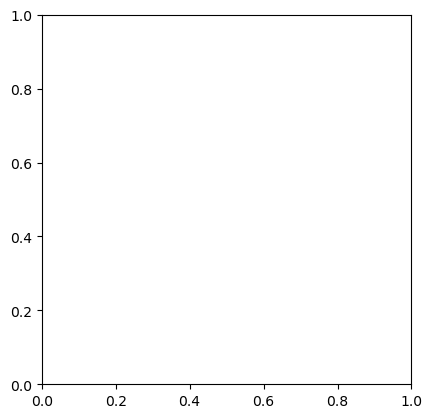

In [68]:
#here, is the data as we want it, within the pandas dataframe. I am taking note of the year column, and the different counts, as something to potentially
#use in a query later on 
#i want to plot the data, so we can try plotting it using the plot function
grocery.plot()

In [69]:
#this makes sense, as our data is primarily objects and we have little to no integers 
#in the meantime, lets count the values for each of our variables
grocery.value_counts()

Series([], Name: count, dtype: int64)

In [71]:
grocery['geoid'].value_counts()

geoid
1400000US06037101110    2
1400000US06037531302    2
1400000US06037530902    2
1400000US06037531000    2
1400000US06037531101    2
                       ..
1400000US06037234600    2
1400000US06037234700    2
1400000US06037234800    2
1400000US06037234901    2
1400000US06037980039    2
Name: count, Length: 2494, dtype: int64

In [72]:
#there are 2,494 census tracts, and all of them are represented twice, which makes sense as the data is a culmination of 2019 & 2015 data
#I am going to convert my data into integers from objects, for a better plot and to be able to query
# Using the pandas reference library for guidance {https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html}
df=pd.DataFrame(grocery)
df

,geoid,geoid20,year,denom_total_pop,lowaccess_count,lowaccess_li_count,lowaccess_kids_count,lowaccess_seniors_count,geometry
0,1400000US06037101110,6037101110,2019,4731,115,37,18,12,None
1,1400000US06037101122,6037101122,2019,3664,1704,137,292,260,None
2,1400000US06037101220,6037101220,2019,3363,0,0,0,0,None
3,1400000US06037101221,6037101221,2019,3260,0,0,0,0,None
4,1400000US06037101222,6037101222,2019,2730,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...
4983,1400000US06037980035,6037980035,2015,6728,377,150,110,26,None
4984,1400000US06037980036,6037980036,2015,7785,1835,647,406,243,None
4985,1400000US06037980037,6037980037,2015,2786,0,0,0,0,None
4986,1400000US06037980038,6037980038,2015,5199,55,3,10,15,None


In [73]:
#Ok that worked! Lets look at the data types of the dataframe
df.dtypes

geoid                        object
geoid20                      object
year                         object
denom_total_pop              object
lowaccess_count              object
lowaccess_li_count           object
lowaccess_kids_count         object
lowaccess_seniors_count      object
geometry                   geometry
dtype: object

In [49]:
#ok, everything is a dataframe, lets see if I can convert lowaccess_kids_count into an integer
#Pulling from a stackoverflow comment {https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int}
df['lowaccess_kids_count']=df['lowaccess_kids_count'].astype(int)

In [74]:
#ok, to check my work 
df.dtypes

geoid                        object
geoid20                      object
year                         object
denom_total_pop              object
lowaccess_count              object
lowaccess_li_count           object
lowaccess_kids_count         object
lowaccess_seniors_count      object
geometry                   geometry
dtype: object

In [75]:
#yay, the kids count is now an integer! however, we will not be converting all the columns into integers for the assignment, so lets do another query with something that is given to us
grocery.query("year =='2019'")

,geoid,geoid20,year,denom_total_pop,lowaccess_count,lowaccess_li_count,lowaccess_kids_count,lowaccess_seniors_count,geometry
0,1400000US06037101110,6037101110,2019,4731,115,37,18,12,None
1,1400000US06037101122,6037101122,2019,3664,1704,137,292,260,None
2,1400000US06037101220,6037101220,2019,3363,0,0,0,0,None
3,1400000US06037101221,6037101221,2019,3260,0,0,0,0,None
4,1400000US06037101222,6037101222,2019,2730,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...
2489,1400000US06037980035,6037980035,2019,6728,217,97,68,13,None
2490,1400000US06037980036,6037980036,2019,7785,1002,359,271,119,None
2491,1400000US06037980037,6037980037,2019,2786,0,0,0,0,None
2492,1400000US06037980038,6037980038,2019,5199,55,3,10,15,None


In [ ]:
#I was able to pull a query of all the census data rows that are in the year 2019. 